In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
lead_df = pd.read_csv(r"C:\Users\SANTHOSH VENUGOPAL\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead_df.shape

(9240, 37)

In [7]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Altering Column Names

In [9]:
altered_columns = []
for i in list(lead_df.columns):
    x=i.replace(" ","_")
    altered_columns.append(x)
    
altered_columns

['Prospect_ID',
 'Lead_Number',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Converted',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit',
 'Last_Activity',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Magazine',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'Receive_More_Updates_About_Our_Courses',
 'Tags',
 'Lead_Quality',
 'Update_me_on_Supply_Chain_Content',
 'Get_updates_on_DM_Content',
 'Lead_Profile',
 'City',
 'Asymmetrique_Activity_Index',
 'Asymmetrique_Profile_Index',
 'Asymmetrique_Activity_Score',
 'Asymmetrique_Profile_Score',
 'I_agree_to_pay_the_amount_through_cheque',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [10]:
#Replacing the Existing columns with the Altered columns 

lead_df.columns = altered_columns
lead_df.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

## Checking Duplicate values on PRIMARY COLUMNS

In [11]:
sum(lead_df.duplicated(subset = 'Prospect_ID')) == 0

True

In [12]:
sum(lead_df.duplicated(subset = 'Lead_Number')) == 0

True

> Since there is no duplicate ID's present in these columns, all the customers are unique.

In [13]:
# We can drop the Prospect_Id and Lead_Number columns, as these are Primary Column comprises of Unique values
lead_df.drop(["Prospect_ID","Lead_Number"],1,inplace=True)

# EDA on Lead Score Dataset

##  Missing Value Treatment

In [14]:
round((lead_df.isnull().sum()/len(lead_df.index)*100),2)

Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper 

In [15]:
lead_df.head(3)

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


>We can observe that **Select** values are present in many columns. Most of the users fill the form mostly via Websites. 
By default every dropdownlist or any field, has the value **Select** if the user did not select any values from the list.
So we can consider the **Select** as **missing values or null values**

In [16]:
#Replacing "Select" with NaN
lead_df.replace("Select",np.nan,inplace=True)

In [17]:
lead_df.head(3)

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [18]:
round((lead_df.isnull().sum()/len(lead_df.index)*100),2)

Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper 

In [19]:
lead_df.shape

(9240, 35)

In [20]:
#From the above Missing values data, we can surely say that data with more than 45% of data missing will not make much impact 
#even after we impute them with any values
# So we can confidently remove these columns

cols=lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 45):
        lead_df.drop(i, 1, inplace = True)

In [21]:
round((lead_df.isnull().sum()/len(lead_df.index)*100),2)

Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Ad

## Univariate Analysis

# Categorical Variable Analysis

 ### Country

In [22]:
lead_df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

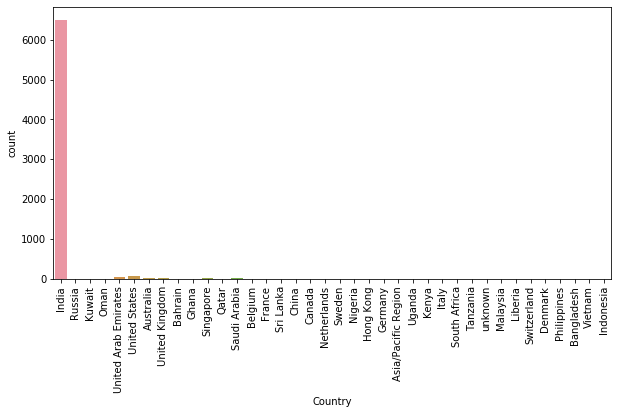

In [23]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(lead_df.Country)
plt.xticks(rotation=90)
plt.show()

In [24]:
# Here as we see that country India has the highest frequency of Occurance. So we can impute the missing values with "INDIA"
lead_df.Country = lead_df.Country.replace(np.nan,"India")
lead_df.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

In [25]:
# Since country has more than 95% of the data in the column as "INDIA" we can get effective insights from this column
#So we can drop this column
lead_df.drop("Country",1,inplace=True)

In [26]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Lead_Origin                                      9240 non-null object
Lead_Source                                      9204 non-null object
Do_Not_Email                                     9240 non-null object
Do_Not_Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9240 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9137 non-null object
Specialization                                   5860 non-null object
What_is_your_current_occupation                  6550 non-null object
What_matters_most_to_you_in_choosing_a_course    6531 non-null object
Search                                           9240

### Specialization

In [27]:
lead_df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
 # Here when we think in a Buisneess logic view, we cannot  impute the max frequency values. Every person has a unique Specilization,
# Persons specilization cannot be null too.So we can include all the null values under "Other Specilizations".
lead_df.Specialization = lead_df.Specialization.replace(np.nan,"Other Specialization")

In [29]:
# We can also shrink the management into a single entity
lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [30]:
lead_df.Specialization.describe()


count                           9240
unique                            11
top       Management_Specializations
freq                            4253
Name: Specialization, dtype: object

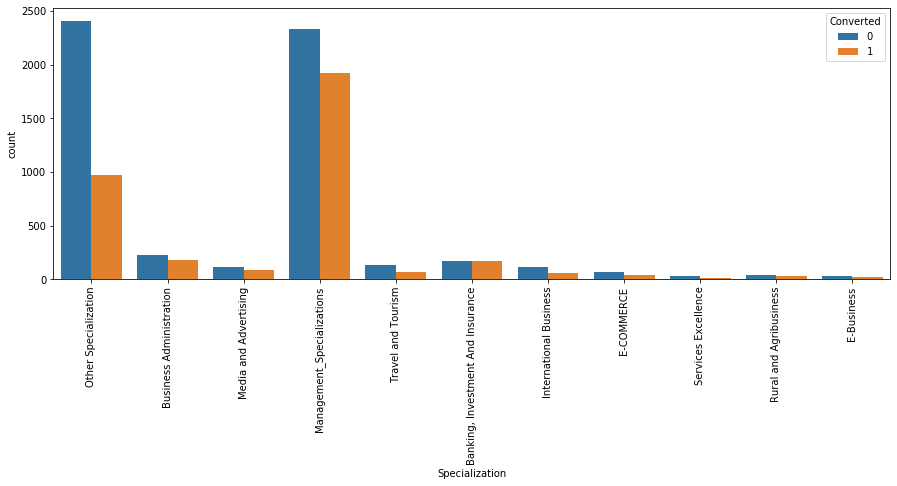

In [31]:
plt.figure(figsize=(15,5))
Spec_plot=sns.countplot("Specialization", data=lead_df,hue="Converted")
Spec_plot.set_xticklabels(Spec_plot.get_xticklabels(),rotation=90)
plt.show()

> Specification is a Significant column. It has good contribution to the overall data

### Current Occupation

In [32]:
lead_df.What_is_your_current_occupation.describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What_is_your_current_occupation, dtype: object

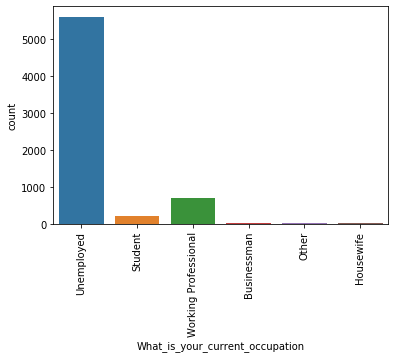

In [33]:
sns.countplot("What_is_your_current_occupation",data=lead_df)
plt.xticks(rotation = 90)
plt.show()

In [34]:
# Here majority is Unemployed category.
# We cannot create a new category for this, as it of no use.
#So, we can fill the Null values with Unemployed
lead_df.What_is_your_current_occupation = lead_df.What_is_your_current_occupation.replace(np.nan,"Unemployed")
lead_df.What_is_your_current_occupation.describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What_is_your_current_occupation, dtype: object

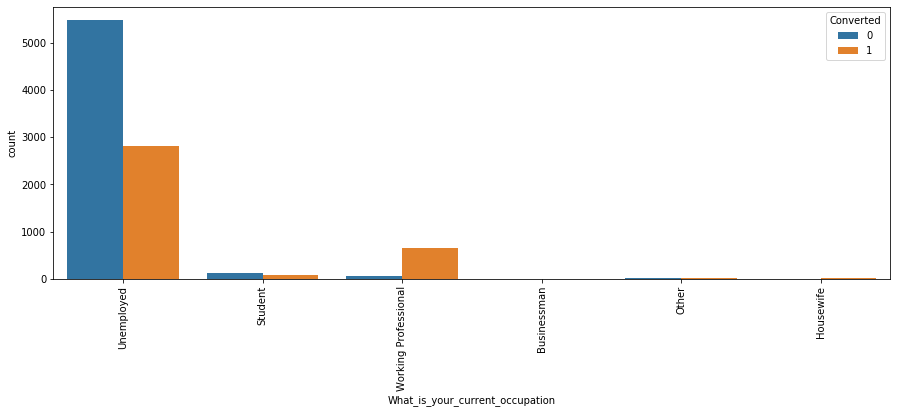

In [35]:
plt.figure(figsize=(15,5))
Occ_plot=sns.countplot("What_is_your_current_occupation", data=lead_df,hue="Converted")
Occ_plot.set_xticklabels(Occ_plot.get_xticklabels(),rotation=90)
plt.show()

### Inference
1. Unemployeed has nearly 50% chance for being converted and Working personal had higher chance to get converted
2. This column is Significant

### What matter most of you choosing a course

In [36]:
lead_df.What_matters_most_to_you_in_choosing_a_course.describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What_matters_most_to_you_in_choosing_a_course, dtype: object

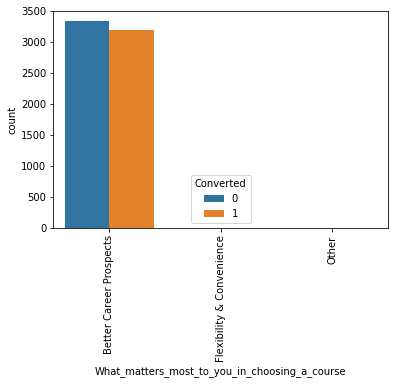

In [37]:
sns.countplot("What_matters_most_to_you_in_choosing_a_course",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

In [38]:
# We can proceed with filling the Nan values with the "Better Career Prospects" because of its Max Occurance

lead_df.What_matters_most_to_you_in_choosing_a_course = lead_df.What_matters_most_to_you_in_choosing_a_course.replace(np.nan,"Better Career Prospects")
lead_df.What_matters_most_to_you_in_choosing_a_course.describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What_matters_most_to_you_in_choosing_a_course, dtype: object

In [39]:
lead_df['What_matters_most_to_you_in_choosing_a_course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [40]:
# Better Career Prospects is the Monopoly here as we saw India in the country column.
# So we can drop this column 
lead_df.drop("What_matters_most_to_you_in_choosing_a_course",1,inplace=True)

### Tags

In [41]:
lead_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

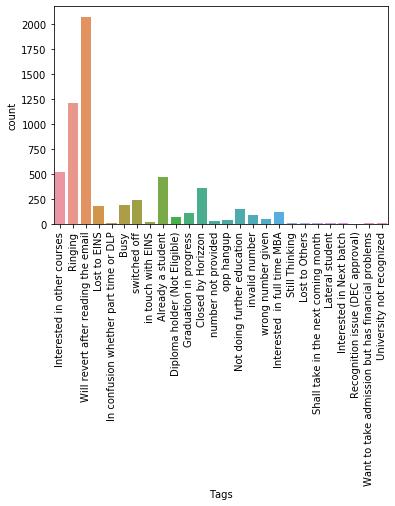

In [42]:
sns.countplot("Tags",data=lead_df)
plt.xticks(rotation = 90)
plt.show()

In [43]:
# Filling the null values with "Will revert after reading the email"because of its Max Occurance
lead_df.Tags = lead_df.Tags.replace(np.nan,"Not Provided")
lead_df.Tags.describe()

count             9240
unique              27
top       Not Provided
freq              3353
Name: Tags, dtype: object

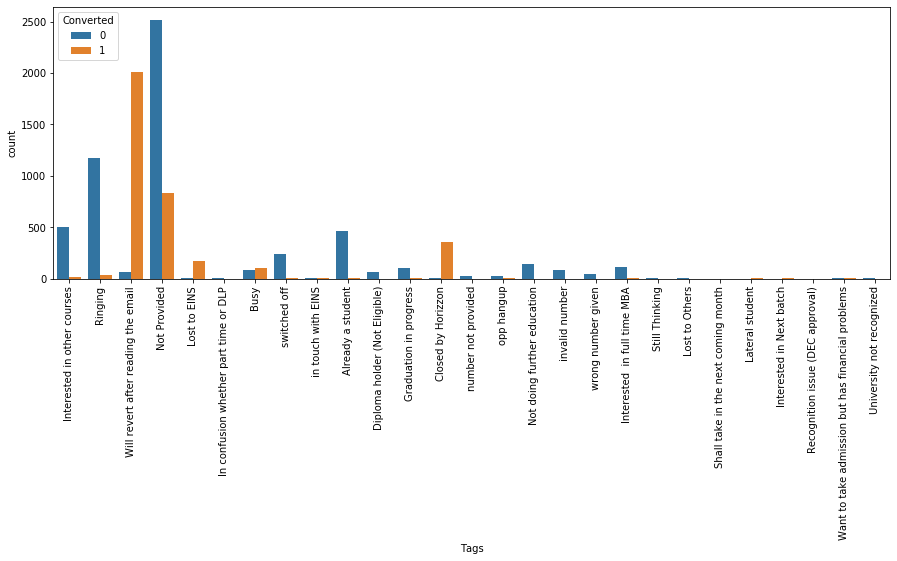

In [44]:
plt.figure(figsize=(15,5))
Tag_plot=sns.countplot("Tags", data=lead_df,hue="Converted")
Tag_plot.set_xticklabels(Tag_plot.get_xticklabels(),rotation=90)
plt.show()

In [45]:
# We can shrink the less contributing values in the column under a Single values
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')


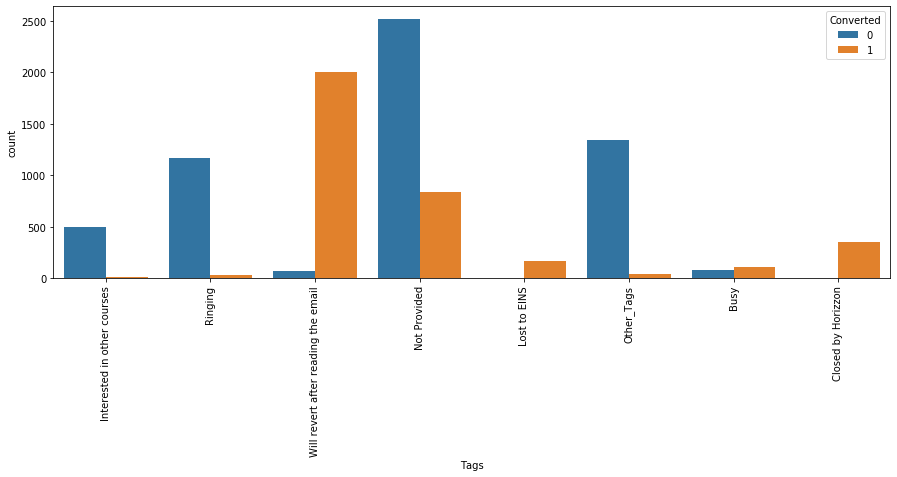

In [46]:
plt.figure(figsize=(15,5))
Tag_plot=sns.countplot("Tags", data=lead_df,hue="Converted")
Tag_plot.set_xticklabels(Tag_plot.get_xticklabels(),rotation=90)
plt.show()

### Inference
1. People who tagged with **"Will Revert afer reading the email"** mostly get converted
2. "Closed by Horizon" had more than 99% chances of being converted

### City

In [47]:
lead_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

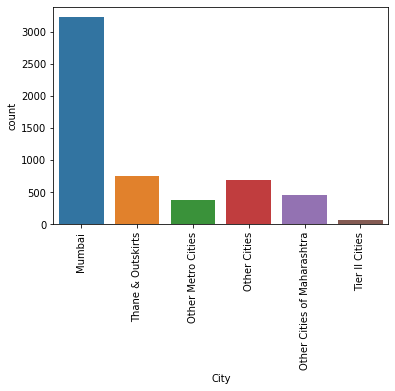

In [48]:
sns.countplot("City",data=lead_df)
plt.xticks(rotation = 90)
plt.show()

In [49]:
# Filling the null values with "Mumbai"because it dominates the city column. So, its safe that, it wont make much difference
lead_df.City = lead_df.City.replace(np.nan,"Mumbai")
lead_df.City.describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

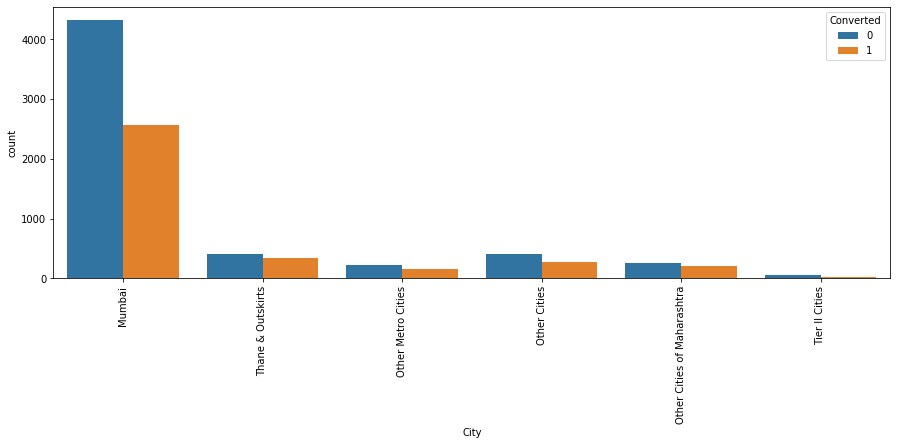

In [50]:
plt.figure(figsize=(15,5))
City_plot=sns.countplot("City", data=lead_df,hue="Converted")
City_plot.set_xticklabels(City_plot.get_xticklabels(),rotation=90)
plt.show()

### Inference
1. About 60% of people in Mumbai gets converted
2. City column is significant

> In **LeadSourceTotalVisits, Page_View_Per_Visit,Last_Activity** columns, we have only less missing values. So that we can remove these rows 


In [51]:
# Removing the rows in the above mentioned columns which has less than 2% missing values 
lead_df.dropna(inplace = True)

In [52]:
round((lead_df.isnull().sum()/len(lead_df.index)*100),2)

Lead_Origin                                 0.0
Lead_Source                                 0.0
Do_Not_Email                                0.0
Do_Not_Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total_Time_Spent_on_Website                 0.0
Page_Views_Per_Visit                        0.0
Last_Activity                               0.0
Specialization                              0.0
What_is_your_current_occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper_Article                           0.0
X_Education_Forums                          0.0
Newspaper                                   0.0
Digital_Advertisement                       0.0
Through_Recommendations                     0.0
Receive_More_Updates_About_Our_Courses      0.0
Tags                                        0.0
Update_me_on_Supply_Chain_Content       

In [53]:
lead_df.shape

(9074, 26)

> Now data is Clean. We can further proceed to do some Categorical and Numerical data analysis for some insights

## Lead Source

In [54]:
lead_df.Lead_Source.describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead_Source, dtype: object

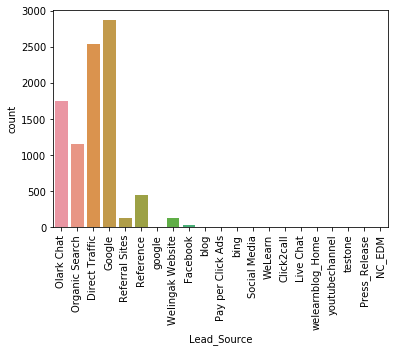

In [55]:
sns.countplot("Lead_Source",data=lead_df)
plt.xticks(rotation = 90)
plt.show()

> We can observe from the above graph is that,only for major companies contributes the most. So we can group other attributes under Other Category

In [56]:
# Replacing Nan values by "Others"
lead_df['Lead_Source'] = lead_df['Lead_Source'].replace(np.nan,'Others')


In [57]:
# Grouping the less contributing sectors
lead_df['Lead_Source'] = lead_df['Lead_Source'].replace('google','Google')
lead_df['Lead_Source'] = lead_df['Lead_Source'].replace('Facebook','Social Media')
lead_df['Lead_Source'] = lead_df['Lead_Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

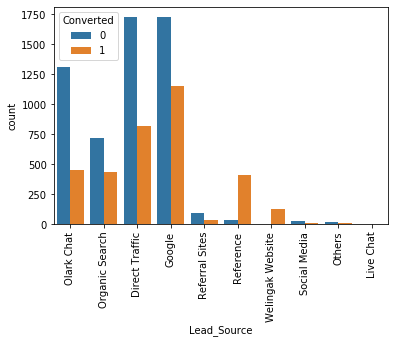

In [58]:
sns.countplot("Lead_Source",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

### Inference
1. People who spends most time on Google got higher chances of being converted
2. Surprisingly **Reference** has 90% converting rate though its quantity is lower

### Last Activity

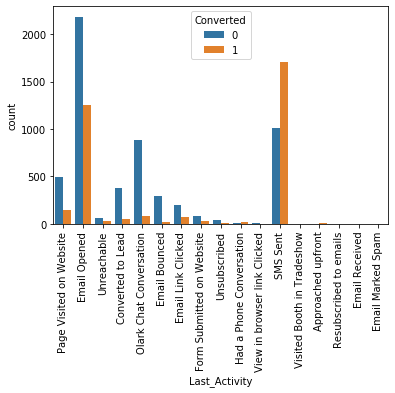

In [59]:
sns.countplot("Last_Activity",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

In [60]:
#Replacing Nan Values with "Others"
lead_df['Last_Activity'] = lead_df['Last_Activity'].replace(np.nan,'Others')

#Grouping Less occured data in the column to "Others"
lead_df['Last_Activity'] = lead_df['Last_Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

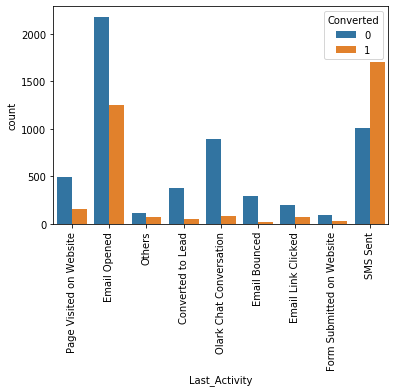

In [61]:
sns.countplot("Last_Activity",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

### Inference
1. People who had their last activity as sending sms shown higher conversion rate
2. Email opened shows 50% conversion rate

In [62]:
#Check the Null Values in All Columns:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead_Origin                                 0.0
Lead_Source                                 0.0
Do_Not_Email                                0.0
Do_Not_Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total_Time_Spent_on_Website                 0.0
Page_Views_Per_Visit                        0.0
Last_Activity                               0.0
Specialization                              0.0
What_is_your_current_occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper_Article                           0.0
X_Education_Forums                          0.0
Newspaper                                   0.0
Digital_Advertisement                       0.0
Through_Recommendations                     0.0
Receive_More_Updates_About_Our_Courses      0.0
Tags                                        0.0
Update_me_on_Supply_Chain_Content       

In [63]:
# As we see only <2% of missing values present in the dataset, which we can remove by dropping the rows 
lead_df = lead_df.dropna()

In [64]:
#Check the Null Values in All Columns:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead_Origin                                 0.0
Lead_Source                                 0.0
Do_Not_Email                                0.0
Do_Not_Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total_Time_Spent_on_Website                 0.0
Page_Views_Per_Visit                        0.0
Last_Activity                               0.0
Specialization                              0.0
What_is_your_current_occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper_Article                           0.0
X_Education_Forums                          0.0
Newspaper                                   0.0
Digital_Advertisement                       0.0
Through_Recommendations                     0.0
Receive_More_Updates_About_Our_Courses      0.0
Tags                                        0.0
Update_me_on_Supply_Chain_Content       

### Thats it!!!. Finally we have dealt with the missing values. We will further analyse the dataset columns for more insights


## Lead Origin

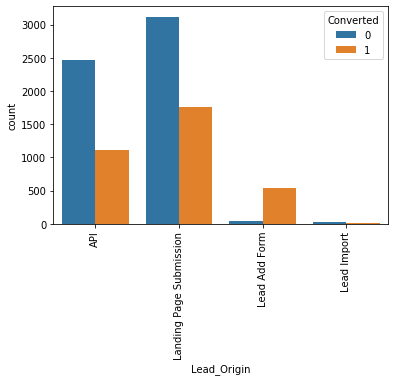

In [65]:
sns.countplot("Lead_Origin",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

### Inference
1. API and Landing Page Submission has higher lead count and they converted them with 50% probability
2. Lead Add Form has highest conversion rate, but the count is less


# Analysing Class Imbalance

##  Do Not Call

In [66]:
lead_df.Do_Not_Call.value_counts(dropna=False)

No     9072
Yes       2
Name: Do_Not_Call, dtype: int64

> Again in Do not Call Column **No**acts as a dominant. This will make higher class imbalance. So we are dropping this column

## Do not Email

In [67]:
lead_df.Do_Not_Email.value_counts(dropna=False)

No     8358
Yes     716
Name: Do_Not_Email, dtype: int64

> Same issue here(Class Imbalance). Dropping this column too

### A_free_copy_of_Mastering_The_Interview

In [68]:
lead_df['A_free_copy_of_Mastering_The_Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

## Search

In [69]:
lead_df.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

## Magazine

In [70]:
lead_df.Magazine.value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

## Newspaper Article

In [71]:
lead_df.Newspaper_Article.value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper_Article, dtype: int64

## Newspaper

In [72]:
lead_df.Newspaper.value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

## X_Education_Forums

In [73]:
lead_df.X_Education_Forums.value_counts(dropna=False)

No     9073
Yes       1
Name: X_Education_Forums, dtype: int64

## Digital_Advertisement

In [74]:
lead_df.Digital_Advertisement.value_counts(dropna=False)

No     9070
Yes       4
Name: Digital_Advertisement, dtype: int64

## Through_Recommendations

In [75]:
lead_df.Through_Recommendations.value_counts(dropna=False)

No     9067
Yes       7
Name: Through_Recommendations, dtype: int64

## Receive_More_Updates_About_Our_Courses

In [76]:
lead_df.Receive_More_Updates_About_Our_Courses.value_counts(dropna=False)

No    9074
Name: Receive_More_Updates_About_Our_Courses, dtype: int64

## Update_me_on_Supply_Chain_Content

In [77]:
lead_df.Update_me_on_Supply_Chain_Content.value_counts(dropna=False)

No    9074
Name: Update_me_on_Supply_Chain_Content, dtype: int64

## Get_updates_on_DM_Content

In [78]:
lead_df.Get_updates_on_DM_Content.value_counts(dropna=False)

No    9074
Name: Get_updates_on_DM_Content, dtype: int64

## I_agree_to_pay_the_amount_through_cheque

In [79]:
lead_df.I_agree_to_pay_the_amount_through_cheque.value_counts(dropna=False)

No    9074
Name: I_agree_to_pay_the_amount_through_cheque, dtype: int64

In [80]:
lead_df.drop(["Do_Not_Call",'Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper',
                 'Digital_Advertisement','Through_Recommendations','Receive_More_Updates_About_Our_Courses',
                 'Update_me_on_Supply_Chain_Content',
                 'Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque'],1,inplace=True)

In [81]:
lead_df.shape

(9074, 14)

## Last Notable Activity

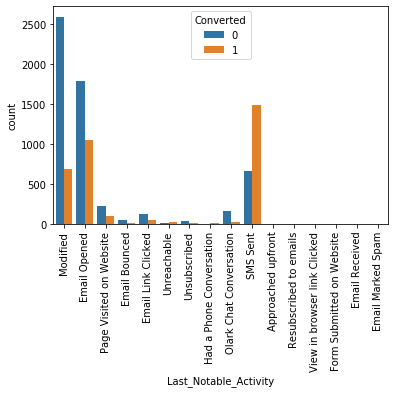

In [82]:
sns.countplot("Last_Notable_Activity",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

In [83]:
# Making a single entity for the less occurance datas

lead_df['Last_Notable_Activity'] = lead_df['Last_Notable_Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other Activity')

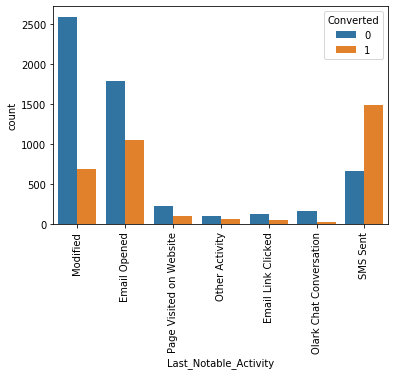

In [84]:
sns.countplot("Last_Notable_Activity",data=lead_df,hue="Converted")
plt.xticks(rotation = 90)
plt.show()

### Inference
1. Sms Sent has highest conversion rate
2. Modified and Email opened have a moderate conversion rate

In [85]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

In [86]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Lead_Origin                               9074 non-null object
Lead_Source                               9074 non-null object
Do_Not_Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total_Time_Spent_on_Website               9074 non-null int64
Page_Views_Per_Visit                      9074 non-null float64
Last_Activity                             9074 non-null object
Specialization                            9074 non-null object
What_is_your_current_occupation           9074 non-null object
Tags                                      9074 non-null object
City                                      9074 non-null object
A_free_copy_of_Mastering_The_Interview    9074 non-null object
Last_Notable_Activity                     9074 non-null object
dtypes: flo

## Numerical Value Analysis

### Pair Plot

C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


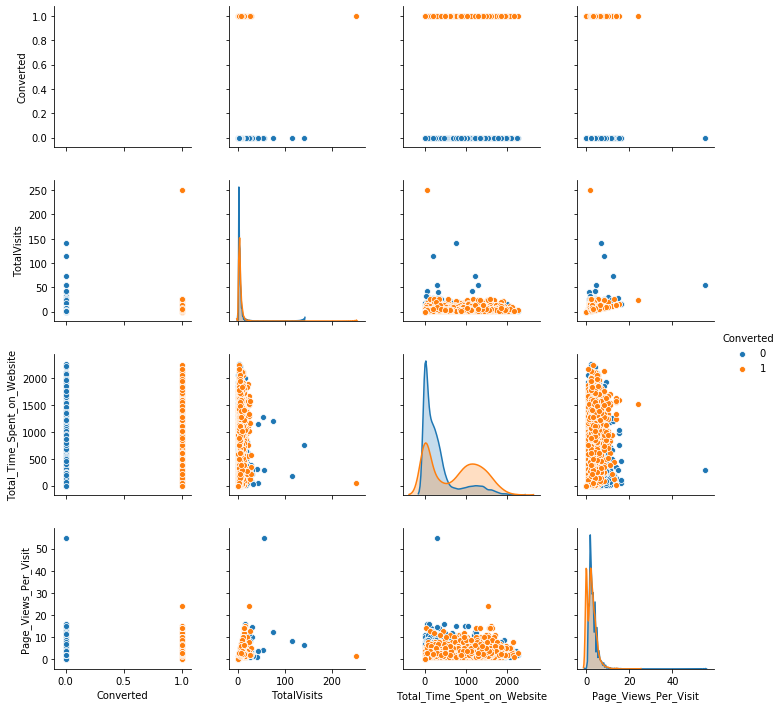

In [87]:
sns.pairplot(lead_df,hue="Converted")

### Correlation Plot

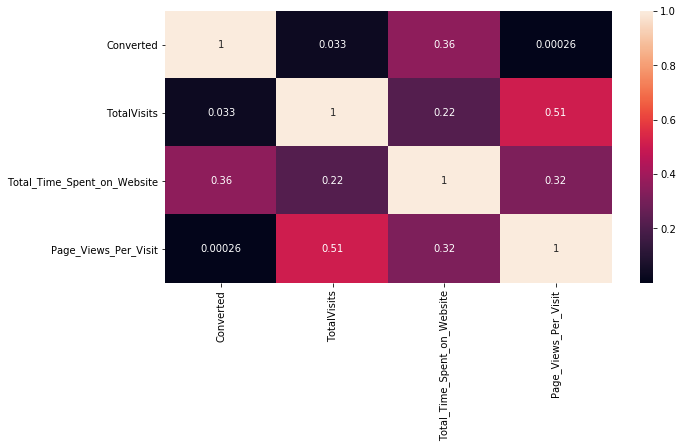

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(),annot=True)

## Outlier Analysis

In [89]:
lead_df.describe()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


> Seems like TotalVisits, Total_Time_Spent_on_Website, Page_Views_Per_Visit has outliers. Lets do the analysis part to find that

### TotalVisits

In [90]:
lead_df["TotalVisits"].quantile([0.96,0.97,0.98,0.99,1])

0.96     10.0
0.97     11.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

> We can remove the 100th percentile as it is the outlier

In [91]:
lead_df = lead_df[lead_df.TotalVisits <=17]
lead_df.TotalVisits.describe()

count    8991.000000
mean        3.217106
std         2.989530
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

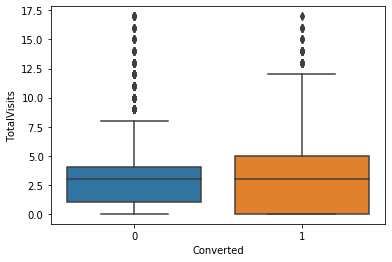

In [92]:
sns.boxplot(x="Converted",y="TotalVisits",data=lead_df)

### Inference
1. Medians are approximately same for both the cases


### Total_Time_Spent_on_Website

In [93]:
lead_df.Total_Time_Spent_on_Website.quantile([0.96,0.97,0.98,0.99,1])

0.96    1600.4
0.97    1655.0
0.98    1726.4
0.99    1837.2
1.00    2272.0
Name: Total_Time_Spent_on_Website, dtype: float64

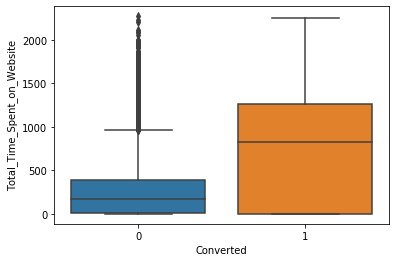

In [94]:
sns.boxplot(x="Converted",y="Total_Time_Spent_on_Website",data=lead_df)

### Inference
1. Person who spend more time on Website has higher conversion rate

### Page_Views_Per_Visit

In [95]:
lead_df.Page_Views_Per_Visit.quantile([0.96,0.97,0.98,0.99,1])

0.96     6.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    16.0
Name: Page_Views_Per_Visit, dtype: float64

In [96]:
lead_df = lead_df[lead_df.Page_Views_Per_Visit <=9]
lead_df.Page_Views_Per_Visit.describe()

count    8924.00000
mean        2.27400
std         1.89403
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         9.00000
Name: Page_Views_Per_Visit, dtype: float64

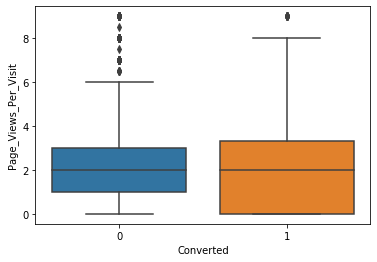

In [97]:
sns.boxplot(x="Converted",y="Page_Views_Per_Visit",data=lead_df)

### Inference
1. Medians are same approximately same for both the cases

In [98]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead_Origin                               0.0
Lead_Source                               0.0
Do_Not_Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total_Time_Spent_on_Website               0.0
Page_Views_Per_Visit                      0.0
Last_Activity                             0.0
Specialization                            0.0
What_is_your_current_occupation           0.0
Tags                                      0.0
City                                      0.0
A_free_copy_of_Mastering_The_Interview    0.0
Last_Notable_Activity                     0.0
dtype: float64

# DATA PREPERATION

### We  can Map the **Yes,No** values to **1 and 0**

In [99]:
# Mapping the Binary columns 
map_list =  ['A_free_copy_of_Mastering_The_Interview','Do_Not_Email']

def mapping_bin(x):
    return x.map({"Yes":1,"No":0})
    
lead_df[map_list] = lead_df[map_list].apply(mapping_bin)

In [100]:
#Fetching the categorical datatype columns

category_cols= lead_df.select_dtypes(include=['object']).columns
category_cols

Index(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization',
       'What_is_your_current_occupation', 'Tags', 'City',
       'Last_Notable_Activity'],
      dtype='object')

## Dummy Variable Creation


In [101]:
lead_df.Lead_Origin.value_counts()

Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead_Origin, dtype: int64

In [102]:
lead_df.What_is_your_current_occupation.value_counts()

Unemployed              8027
Working Professional     665
Student                  203
Other                     13
Housewife                  9
Businessman                7
Name: What_is_your_current_occupation, dtype: int64

In [103]:
lead_df.Specialization.value_counts()

Management_Specializations           4119
Other Specialization                 3262
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

### Creating Dummy Variables and  Concatinating with the Original DataFrame

In [104]:


dummy_df = pd.get_dummies(lead_df[["Lead_Origin","What_is_your_current_occupation","City"]],drop_first=True)
lead_df = pd.concat([lead_df,dummy_df],1)


dummy_df = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy_df = dummy_df.drop(['Specialization_Other Specialization'], 1)
lead_df = pd.concat([lead_df, dummy_df], axis = 1)


dummy_df = pd.get_dummies(lead_df['Lead_Source'], prefix  = 'Lead_Source')
dummy_df = dummy_df.drop(['Lead_Source_Others'], 1)
lead_df = pd.concat([lead_df, dummy_df], axis = 1)


dummy_df = pd.get_dummies(lead_df['Last_Activity'], prefix  = 'Last_Activity')
dummy_df = dummy_df.drop(['Last_Activity_Others'], 1)
lead_df = pd.concat([lead_df, dummy_df], axis = 1)


dummy_df = pd.get_dummies(lead_df['Tags'], prefix  = 'Tags')
dummy_df = dummy_df.drop(['Tags_Not Provided'], 1)
lead_df = pd.concat([lead_df, dummy_df], axis = 1)


dummy_df = pd.get_dummies(lead_df['Last_Notable_Activity'], prefix  = 'Last_Notable_Activity')
dummy_df = dummy_df.drop(['Last_Notable_Activity_Other Activity'], 1)
lead_df = pd.concat([lead_df, dummy_df], axis = 1)



In [105]:
lead_df.shape

(8924, 67)

In [106]:
# Now we can drop the Original Columns,its is of no use now
lead_df.drop(category_cols,1,inplace=True)
lead_df.shape

(8924, 59)

In [107]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 59 columns):
Do_Not_Email                                            8924 non-null int64
Converted                                               8924 non-null int64
TotalVisits                                             8924 non-null float64
Total_Time_Spent_on_Website                             8924 non-null int64
Page_Views_Per_Visit                                    8924 non-null float64
A_free_copy_of_Mastering_The_Interview                  8924 non-null int64
Lead_Origin_Landing Page Submission                     8924 non-null uint8
Lead_Origin_Lead Add Form                               8924 non-null uint8
Lead_Origin_Lead Import                                 8924 non-null uint8
What_is_your_current_occupation_Housewife               8924 non-null uint8
What_is_your_current_occupation_Other                   8924 non-null uint8
What_is_your_current_occupation_Student              

In [108]:
lead_df.head()

,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,What_is_your_current_occupation_Housewife,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Train - Test Split

In [109]:
from sklearn.model_selection import train_test_split

y = lead_df.pop("Converted")

X = lead_df

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3, random_state = 100)

In [111]:
X_train.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
6676,0,3.0,1247,3.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6138,0,4.0,816,4.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8650,0,3.0,1128,3.0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3423,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6552,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
X_train.shape

(6246, 58)

In [113]:
X_test.shape

(2678, 58)

## Standardizing the Numerical Columns

In order to further proceeding with the Modal Building we need to Standardize the Numerical Columns

In [114]:
# Filtering the Numerical Columns
num_columns = X_train.select_dtypes(include=["int64","float64"]).columns
num_columns

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'A_free_copy_of_Mastering_The_Interview'],
      dtype='object')

In [115]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train[num_columns]  = scalar.fit_transform(X_train[num_columns])

X_train.head()

C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
6676,-0.285584,-0.049636,1.395668,0.395289,-0.669212,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6138,-0.285584,0.297929,0.609686,0.926758,-0.669212,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8650,-0.285584,-0.049636,1.178657,0.395289,1.494296,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3423,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Modal Building

In [116]:
#Importing StatsModal
import statsmodels.api as sm

In [117]:
#Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Importing RFE module for Feature Selection
# We will select the TOp 15 features out of 58
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)


In [118]:
# Ranking "1" denotes the Top Features ,True for Selected COlumns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', False, 29),
 ('TotalVisits', False, 22),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 21),
 ('A_free_copy_of_Mastering_The_Interview', False, 41),
 ('Lead_Origin_Landing Page Submission', False, 6),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 15),
 ('What_is_your_current_occupation_Housewife', False, 34),
 ('What_is_your_current_occupation_Other', False, 33),
 ('What_is_your_current_occupation_Student', False, 18),
 ('What_is_your_current_occupation_Unemployed', False, 13),
 ('What_is_your_current_occupation_Working Professional', False, 2),
 ('City_Other Cities', False, 39),
 ('City_Other Cities of Maharashtra', False, 44),
 ('City_Other Metro Cities', False, 12),
 ('City_Thane & Outskirts', False, 42),
 ('City_Tier II Cities', False, 17),
 ('Specialization_Banking, Investment And Insurance', False, 36),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 16),
 (

In [119]:
filtered_cols  = X_train.columns[rfe.support_]
filtered_cols

Index(['Total_Time_Spent_on_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

> Above Columns will be used for our Modal Building

## MODAL #1

In [120]:
X_train_sm = sm.add_constant(X_train[filtered_cols])
log_mod1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = log_mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.1
Date:                Mon, 02 Mar 2020   Deviance:                       2480.3
Time:                        21:00:57   Pearson chi2:                 8.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5859      0.096    -16.496      0.000      -1.774      -1.398
Total_Time_Spent_on_Website                       1.0830      0.061     17.798      0.000       0.964       1.202
Lead_Origin_Lead Add Form                         1.7763      0.425      4.177      0.000       0.943       2.610
Lead_Source_Olark Chat                            1.2092      0.144      8.406      0.000       0.927       1.491
Lead_Source_Welingak Website                      3.4826      0.848      4.107      0.000       1.821       5.145
Last_Activity_Email Bounced                      -1.4939      0.541     -2.760      0.006      -2.555      -0.433
Last_Activity_SMS Sent                            1.3820      0.231      5.994      0.000       0.930       1.834
Tags_Closed by Horizzon                           6.4254      0.738      8.705      0.000       4.979       7.872
Tags_Interested in other courses                 -2.0275      0.394     -5.143      0.000      -2.800      -1.255
Tags_Lost to EINS                                 5.3589      0.533     10.063      0.000       4.315       6.403
Tags_Other_Tags                                  -2.6413      0.228    -11.605      0.000      -3.087      -2.195
Tags_Ringing                                     -3.6868      0.255    -14.470      0.000      -4.186      -3.187
Tags_Will revert after reading the email          4.4231      0.190     23.339      0.000       4.052       4.794
Last_Notable_Activity_Modified                   -1.4460      0.155     -9.352      0.000      -1.749      -1.143
Last_Notable_Activity_Olark Chat Conversation    -1.7724      0.420     -4.216      0.000      -2.597      -0.948
Last_Notable_Activity_SMS Sent                    0.7924      0.263      3.009      0.003       0.276       1.309
=================================================================================================================
"""

> There is no Higher P-values, infering no correlation exist   
We can further analyse using the Variance Inflation Factor(VIF)

### VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[filtered_cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[filtered_cols].values,i) for i in range(X_train[filtered_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last_Notable_Activity_SMS Sent,6.52
5,Last_Activity_SMS Sent,6.36
12,Last_Notable_Activity_Modified,1.92
1,Lead_Origin_Lead Add Form,1.77
11,Tags_Will revert after reading the email,1.60
2,Lead_Source_Olark Chat,1.46
0,Total_Time_Spent_on_Website,1.44
3,Lead_Source_Welingak Website,1.31
6,Tags_Closed by Horizzon,1.20
9,Tags_Other_Tags,1.18


> There is a High correction exist in **"Last_Notable_Activity_SMS Sent"**. and **Last_Activity_SMS Sent**.   
We will first drop the first one and see the VIF's change

In [123]:
filtered_cols = filtered_cols.drop("Last_Notable_Activity_SMS Sent",1)
len(filtered_cols)

14

## Modal #2

In [124]:
X_train_sm = sm.add_constant(X_train[filtered_cols])
log_mod2  = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = log_mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.7
Date:                Mon, 02 Mar 2020   Deviance:                       2489.4
Time:                        21:00:57   Pearson chi2:                 8.84e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5349      0.094    -16.374      0.000      -1.719      -1.351
Total_Time_Spent_on_Website                       1.0773      0.061     17.788      0.000       0.959       1.196
Lead_Origin_Lead Add Form                         1.7481      0.430      4.064      0.000       0.905       2.591
Lead_Source_Olark Chat                            1.2349      0.143      8.653      0.000       0.955       1.515
Lead_Source_Welingak Website                      3.4706      0.853      4.068      0.000       1.799       5.143
Last_Activity_Email Bounced                      -1.3974      0.545     -2.566      0.010      -2.465      -0.330
Last_Activity_SMS Sent                            1.9819      0.116     17.108      0.000       1.755       2.209
Tags_Closed by Horizzon                           6.5893      0.739      8.917      0.000       5.141       8.038
Tags_Interested in other courses                 -1.9646      0.392     -5.005      0.000      -2.734      -1.195
Tags_Lost to EINS                                 5.4909      0.535     10.265      0.000       4.443       6.539
Tags_Other_Tags                                  -2.5965      0.225    -11.519      0.000      -3.038      -2.155
Tags_Ringing                                     -3.5930      0.250    -14.349      0.000      -4.084      -3.102
Tags_Will revert after reading the email          4.4970      0.191     23.484      0.000       4.122       4.872
Last_Notable_Activity_Modified                   -1.7329      0.128    -13.577      0.000      -1.983      -1.483
Last_Notable_Activity_Olark Chat Conversation    -1.8521      0.421     -4.397      0.000      -2.678      -1.027
=================================================================================================================
"""

> There is no Notable Correlation existing between the Variables.   
We can check VIF also

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[filtered_cols].columns
vif["VIF"] = [variance_inflation_factor(X_train[filtered_cols].values,i) for i in range(X_train[filtered_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,1.77
11,Tags_Will revert after reading the email,1.55
12,Last_Notable_Activity_Modified,1.55
5,Last_Activity_SMS Sent,1.46
0,Total_Time_Spent_on_Website,1.44
2,Lead_Source_Olark Chat,1.43
3,Lead_Source_Welingak Website,1.31
6,Tags_Closed by Horizzon,1.20
9,Tags_Other_Tags,1.16
7,Tags_Interested in other courses,1.11


> Thats it..! We removed all the multi-colliearity between the variables

## Prediction

In [126]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.988634
6138    0.996319
8650    0.985684
3423    0.048376
6552    0.223347
1696    0.288316
2110    0.985899
6830    0.411423
2581    0.005935
5927    0.086326
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.9886342 , 0.99631908, 0.9856836 , 0.04837596, 0.22334711,
       0.28831561, 0.98589894, 0.41142326, 0.00593468, 0.08632629])

In [128]:
#Creating a dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_pred':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID
0,1,0.988634,6676
1,1,0.996319,6138
2,1,0.985684,8650
3,0,0.048376,3423
4,0,0.223347,6552


In [129]:
#creating a new column 'predicted' if the predicted value is >0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,predicted
0,1,0.988634,6676,1
1,1,0.996319,6138,1
2,1,0.985684,8650,1
3,0,0.048376,3423,0
4,0,0.223347,6552,0


### Confusion Matrix

In [130]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3701  170]
 [ 290 2085]]


In [131]:
#Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9263528658341339


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
#Sensitivity
TP / float(TP+FN)

0.8778947368421053

In [134]:
#Specificity
TN / float(TN+FP)

0.9560836993025058

### ROC Curve

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- mThe closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_pred, drop_intermediate = False )

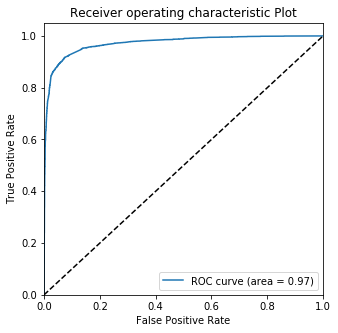

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

### Optimal Cutoff Probability

Logistic regression model is a probability, in order to use it as a classifier, we'll have to choose a cutoff value,
or you can say its a threshold value. Where scores above this value will classified as positive, those below as negative.

In [138]:
# Let's create columns with different probability cutoffs between 0 to 1
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0


In [139]:
#We need to now find the accuracy, sensitivity and specificity of various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] #various cutoff probabilities

# TP = confusion[1,1] 
# TN = confusion[0,0] 
# FP = confusion[0,1] 
# FN = confusion[1,0] 

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.380243     1.000000     0.000000
0.1          0.1  0.832533     0.971368     0.747352
0.2          0.2  0.896574     0.952000     0.862568
0.3          0.3  0.922030     0.914105     0.926892
0.4          0.4  0.923791     0.899368     0.938776
0.5          0.5  0.926353     0.877895     0.956084
0.6          0.6  0.927153     0.856842     0.970292
0.7          0.7  0.912424     0.802947     0.979592
0.8          0.8  0.901857     0.768000     0.983983
0.9          0.9  0.883926     0.711158     0.989925


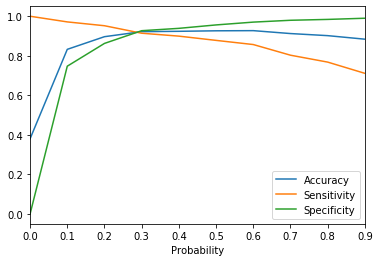

In [140]:
#Now let's go ahead and plot these values
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From above plot we can say the 0.3 is an optimum point to be taken as cutoff

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_pred.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_pred,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0,0


### Assigning Lead Score

In [142]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_pred.map( lambda x: round(x*100))

y_train_pred_final.head()


,Converted,Converted_pred,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1,1,99
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1,1,100
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1,1,99
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0,0,5
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0,0,22


In [143]:

print("Accuracy of the Training dataset is {}%".format(round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)))



Accuracy of the Training dataset is 92.2%


In [144]:
#Let's check tha confusion matrix again after conidering the optimal cuttof
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3588,  283],
       [ 204, 2171]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
#Sensitivity
print("Sensitivity of Train Dataset is {}%".format(round(100*TP / float(TP+FN),2)))

Sensitivity of Train Dataset is 91.41%


In [147]:
#Specificity
print("Specificity of Train Dataset is {}%".format(round(100*TN / float(TN+FP),2)))

Specificity of Train Dataset is 92.69%


### Precision and Recall

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3701,  170],
       [ 290, 2085]], dtype=int64)

In [149]:
#Precision
#TP / TP + FP
print("Precison of Train Dataset is {}%".format(round(100*confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)))

Precison of Train Dataset is 92.46%


In [150]:
#Recall
#TP / TP + FN
print("Recall of Train Dataset is {}%".format(round(100*confusion[1,1]/(confusion[1,0]+confusion[1,1])),2))

Recall of Train Dataset is 88.0%


In [151]:
from sklearn.metrics import precision_score, recall_score

In [152]:
print("Precison Score of Train Dataset is {}%".
      format(round(100*precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted),2)))

Precison Score of Train Dataset is 92.46%


In [153]:
print("Recall Score of Train Dataset is {}%".
      format(round(100*recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)))


Recall Score of Train Dataset is 87.79%


## Train Dataset

- Accuracy - 92.2 %
- Sensitivity - 91.41 %
- Specificity - 92.69 %
- Precison Score - 92.46 %
- Recall Score - 87.79 %

### Precision Recall curve

In [154]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

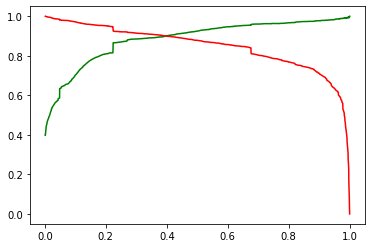

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here, the cutoff is almost equal to 0.3. So, we can keep this model.

### Predictions on test set

In [156]:
X_train.columns

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'What_is_your_current_occupation_Housewife',
       'What_is_your_current_occupation_Other',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed',
       'What_is_your_current_occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SANTHOSH VENUGOPAL\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
6676,-0.285584,-0.049636,1.395668,0.395289,-0.669212,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6138,-0.285584,0.297929,0.609686,0.926758,-0.669212,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8650,-0.285584,-0.049636,1.178657,0.395289,1.494296,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3423,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [158]:
X_test = X_test[filtered_cols]
X_test.head()

,Total_Time_Spent_on_Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
7625,2.145058,0,0,0,0,0,0,0,0,1,0,0,0,0
5207,0.772700,0,0,0,0,0,0,0,0,0,0,1,0,0
2390,-0.885722,1,0,0,0,1,0,0,0,0,0,1,0,0
4362,-0.451952,0,0,0,0,1,0,0,0,0,1,0,0,0
1023,-0.293028,0,0,0,0,0,0,1,0,0,0,0,0,0


In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
#Predictions
y_test_pred = res.predict(X_test_sm)

In [161]:
y_test_pred[:10]

7625    0.139377
5207    0.978003
2390    0.996789
4362    0.025761
1023    0.021559
8226    0.990071
3079    0.143802
530     0.012537
7873    0.048014
5146    0.997941
dtype: float64

In [162]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
y_pred_1.head()

,0
7625,0.139377
5207,0.978003
2390,0.996789
4362,0.025761
1023,0.021559


In [164]:
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [168]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.139377
1,1,5207,0.978003
2,1,2390,0.996789
3,0,4362,0.025761
4,0,1023,0.021559


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_pred'})

In [170]:
y_pred_final

,Converted,Prospect ID,Converted_pred
0,0,7625,0.139377
1,1,5207,0.978003
2,1,2390,0.996789
3,0,4362,0.025761
4,0,1023,0.021559
...,...,...,...
2673,0,1555,0.048014
2674,0,566,0.119035
2675,0,6433,0.027242
2676,0,898,0.000561


In [171]:
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_pred'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_pred
0,7625,0,0.139377
1,5207,1,0.978003
2,2390,1,0.996789
3,4362,0,0.025761
4,1023,0,0.021559


In [172]:
#Again find 'finl predicted' value based on our cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_pred.map(lambda x: 1 if x > 0.3 else 0)

In [173]:
y_pred_final.head()

,Prospect ID,Converted,Converted_pred,final_predicted
0,7625,0,0.139377,0
1,5207,1,0.978003,1
2,2390,1,0.996789,1
3,4362,0,0.025761,0
4,1023,0,0.021559,0


In [174]:
print("Accuracy Score of Test Dataset is {}%".
      format(round(100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)))


Accuracy Score of Test Dataset is 92.42%


In [175]:
#accuracy score
round(100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

92.42

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1560,  124],
       [  79,  915]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
#Sensitivity
print("Sensitivity of Test Dataset is {}%".
      format(round(100*(TP / float(TP+FN)),2)))



Sensitivity of Test Dataset is 92.05%


In [179]:
#Specificity

print("Specificity of Test Dataset is {}%".
      format(round(100*(TN / float(TN+FP)),2)))


Specificity of Test Dataset is 92.64%


# Test Data

- Accuracy = 92.42 %
- Sensitivity = 92.05 %
- Specificity = 92.64 %

In [180]:
new_params = res.params[1:]
new_params

Total_Time_Spent_on_Website                      1.077300
Lead_Origin_Lead Add Form                        1.748098
Lead_Source_Olark Chat                           1.234878
Lead_Source_Welingak Website                     3.470638
Last_Activity_Email Bounced                     -1.397424
Last_Activity_SMS Sent                           1.981928
Tags_Closed by Horizzon                          6.589339
Tags_Interested in other courses                -1.964629
Tags_Lost to EINS                                5.490901
Tags_Other_Tags                                 -2.596492
Tags_Ringing                                    -3.592996
Tags_Will revert after reading the email         4.497017
Last_Notable_Activity_Modified                  -1.732901
Last_Notable_Activity_Olark Chat Conversation   -1.852099
dtype: float64

In [181]:
#feature_importance = abs(new_params)
significant_features = new_params
significant_features = 100.0 * (significant_features / significant_features.max())
significant_features

Total_Time_Spent_on_Website                       16.349138
Lead_Origin_Lead Add Form                         26.529189
Lead_Source_Olark Chat                            18.740538
Lead_Source_Welingak Website                      52.670510
Last_Activity_Email Bounced                      -21.207348
Last_Activity_SMS Sent                            30.077800
Tags_Closed by Horizzon                          100.000000
Tags_Interested in other courses                 -29.815274
Tags_Lost to EINS                                 83.330080
Tags_Other_Tags                                  -39.404435
Tags_Ringing                                     -54.527417
Tags_Will revert after reading the email          68.246862
Last_Notable_Activity_Modified                   -26.298551
Last_Notable_Activity_Olark Chat Conversation    -28.107512
dtype: float64

In [182]:
significant_features = significant_features.to_frame()
significant_features

,0
Total_Time_Spent_on_Website,16.349138
Lead_Origin_Lead Add Form,26.529189
Lead_Source_Olark Chat,18.740538
Lead_Source_Welingak Website,52.670510
Last_Activity_Email Bounced,-21.207348
Last_Activity_SMS Sent,30.077800
Tags_Closed by Horizzon,100.000000
Tags_Interested in other courses,-29.815274
Tags_Lost to EINS,83.330080
Tags_Other_Tags,-39.404435


In [183]:
significant_features=significant_features.reset_index()

In [184]:
significant_features.columns = ["Significant_Columns","Coefficient"]
significant_features.sort_values(by="Coefficient",ascending=False,inplace=True)
significant_features

,Significant_Columns,Coefficient
6,Tags_Closed by Horizzon,100.000000
8,Tags_Lost to EINS,83.330080
11,Tags_Will revert after reading the email,68.246862
3,Lead_Source_Welingak Website,52.670510
5,Last_Activity_SMS Sent,30.077800
1,Lead_Origin_Lead Add Form,26.529189
2,Lead_Source_Olark Chat,18.740538
0,Total_Time_Spent_on_Website,16.349138
4,Last_Activity_Email Bounced,-21.207348
12,Last_Notable_Activity_Modified,-26.298551


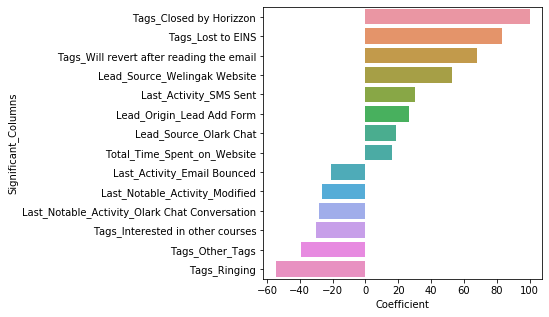

In [185]:
plt.figure(figsize=(5,5))
sns.barplot("Coefficient","Significant_Columns",data=significant_features)
plt.show()

### High and Low significant features that significantly affects the prediction of our Modal

#### Top 3 Significant Features:
- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email

#### Bottom 3 Significant Features:
- Tags_Ringing
- Tags_Other_Tags
- Tags_Interested in other courses	

>Need to Concentrate more on the above features, to increase the prediction capability

# OBSERVATIONS:

## Train Dataset

- Accuracy - 92.2 %
- Sensitivity - 91.41 %
- Specificity - 92.69 %


## Test Data

- Accuracy = 92.42 %
- Sensitivity = 92.05 %
- Specificity = 92.64 %